# <center>Learning how to play Space Invaders with RL.</center>

![space invaders poster image](https://cdn-images-1.medium.com/max/1200/1*Ya6drllhmC82yh0J-elrPA.jpeg)

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8809172034174092114
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2644443136
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15289471880300493518
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
import gym
import numpy as np
from dqn.model import ModelVanilla
from dqn.train import Train 
from dqn.dqnAgent import DQNAgent
import matplotlib.pyplot as plt

from gym.wrappers.atari_preprocessing import AtariPreprocessing
from dqn.atari_wrappers import NoopResetEnv, MaxAndSkipEnv, wrap_deepmind

ModuleNotFoundError: No module named 'dqn.atary_wrappers'

In [10]:
env = gym.make('SpaceInvaders-v0')

env = NoopResetEnv(env)
env = MaxAndSkipEnv(env)
env = wrap_deepmind(env, episode_life=False, clip_rewards=False, frame_stack=True, scale=False)

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [11]:
print(env.observation_space.shape)
print(env.action_space)

(84, 84, 4)
Discrete(6)


### Agent acting randomly

In [12]:
from tqdm import tqdm

reward_random = []

for i in tqdm(range(500)):
    total_reward = 0
    env.reset()
    while True:
        #env.render()
        next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
        total_reward += reward
        if done:
            reward_random.append(total_reward)
            break

    env.close()
    
print("Average score over a {} episodes: {}".format(500, np.asarray(reward_random).mean()))

100%|██████████| 500/500 [02:47<00:00,  2.44it/s]

Average score over a 500 episodes: 143.33


### State sequence

Each state will look like a sequence of 4 frames. Every frame is cropped and preprocessed for faster and more efficient computations.

(4, 84, 84)


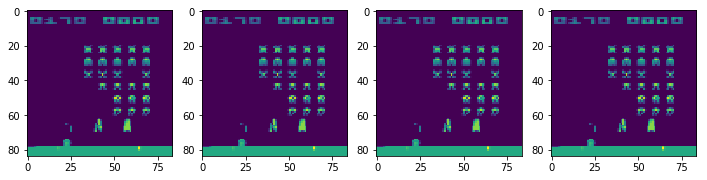

In [13]:
#env.reset()

# Create a new state
next_state, reward, done, info = env.step((env.action_space.sample())) # select random action

print(np.asarray(next_state).transpose(2, 0, 1).shape)
# Plot the state
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
ax = axes.ravel()

for i, frame in enumerate(np.asarray(next_state).transpose(2, 0, 1)):
    ax[i].imshow(frame)

### Establishing a benchmark

I'll be using two benchmarks:
* The performance of an agent without training over 100 games
* The performance of a human
    * My avg performance over 50 games: 520
    * Avg performance of profesional tester according to DeepMind's Paper: 1652

 score: 390.0: 100%|██████████| 500/500 [02:48<00:00,  2.54it/s]

Average score: 137.64


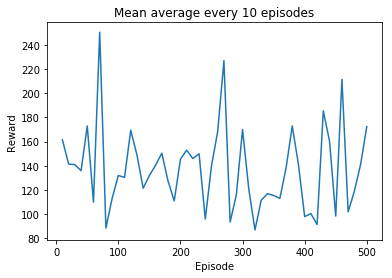

In [14]:
episodes_eval = 500
agent_bench = DQNAgent()
benchmark = Train(env, agent_bench)

# Evaluate performance
benchmark.train(episodes_eval, learn=False, render=False)

# Plot rewards
benchmark.plot_rewards()

## Training

In [ ]:
episodes_train = 20000
agent_train = DQNAgent(dueling=False)
# Load existing saved weights
# Comment if don't want to load pre-trained weights
#agent_train.load_weights('best_model_dueling')

train = Train(env, agent_train)
# Train the agent
train.train(episodes_train, learn=True, render=False)

# Plot rewards
train.plot_rewards(mean_avg=10)
train.plot_rewards(mean_avg=50)
train.plot_rewards(mean_avg=100)

 score: 75.0:   0%|          | 20/20000 [00:18<4:36:49,  1.20it/s]   

In [ ]:
train.load_rewards()

# Plot rewards
train.plot_rewards(mean_avg=10)
train.plot_rewards(mean_avg=50)
train.plot_rewards(mean_avg=100)

In [ ]:
# Evaluate the trained agent
episodes_eval = 500

# agent_trained = train.agent
agent_trained = DQNAgent(dueling=False)
agent_trained.load_weights('vanilla')
evaluation = Train(env, agent_trained)

# Evaluate performance
evaluation.train(episodes_eval, learn=False, render=False, monitor=True)

# Plot rewards
evaluation.plot_rewards(mean_avg=10)

In [ ]:
train.rewards